# SSLTelecom

## Problema

Te escribimos de la peluquería SSL, esta pandemia – entre otras cosas –, ha afectado a nuestro negocio, que a veces parece que está a punto de cerrar, para nuestro disgusto. Como no queremos rendirnos tan fácilmente, hemos pensado en abrir un nuevo negocio de **venta de teléfonos móviles** para ver si sacamos suficientes beneficios para mantener la pelu a flote.

Supongo que a estas alturas, te estarás preguntando: ¿y yo qué pinto en el negocio? Pues la verdad, es que no sabemos muy bien qué precio ponerle a nuestros teléfonos móviles y no queremos quedar atrás de nuestros competidores. Es por eso que necesitamos la ayuda de un **orfebre Data Scientist** que nos ayude a estimar correctamente el rango de precio de un teléfono móvil (bajo/medio/alto) para nosotras podernos hacer una idea del precio final al que podemos venderlo y no perder dinero.

Hemos adjuntado el fichero con los datos que tenemos disponibles actualmente. Si necesitas un diccionario con información relativa a los datos, háznoslo saber.

## Datos

- **Battery power**: indica la batería del móvil expresada en mAh
- **Blue**: indica si el móvil tiene bluetooth (1) o no (0)
- **Clock speed**: indica la rapidez de procesamiento
- **Dual sim**: indica si el móvil soporta dos SIM (1) o no (0)
- **Fc**: megapíxeles de la cámara frontal
- **Four_g**: indica si el móvil tiene 4G (1) o no (0)
- **Int_memory**: memoria interna expresada en Gb
- **M_dep**: grosor del teléfono móvil
- **Mobile_wt**: peso del teléfono móvil
- **N_cores**: número de cores del procesador
- **Pc**: megapíxeles de la cámara principal
- **Px_height**: resolución de píxeles (altura)
- **Px_width**: resolución de píxeles (ancho)
- **Ram**: RAM del móvil expresada en MegaBytes
- **Sc_h**: altura de la pantalla del móvil expresada en cm
- **Sc_w**: ancho de la pantalla del móvil expresada en cm
- **Talk time**: duración de la batería durante una conversación
- **Three_g**: indica si el móvil tiene 3G (1) o no (0)
- **Touch_screen**: indica si la pantalla del móvil es táctil (1) o no (0)
- **WiFi**: indica si el móvil tiene WiFi (1) o no (0)
- **Price-range**: indica si el móvil es de costo bajo (0), medio (1), alto (2) o muy alto (3)

In [74]:
import warnings
warnings.filterwarnings('ignore')

## Lectura de datos

In [75]:
import pandas as pd

DATA_FILEPATH = '../data/mobile_phone_info.csv'
df = pd.read_csv(DATA_FILEPATH)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Exploración de los datos

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Lo primero que podemos ver es que todas las columnas del dataset son numéricas. Además, podemos ver que no hay valores nulos y que contamos con un dataset de 2000 finals y 21 columnas

In [77]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Análisis descriptivo

Vamos a evaluar las variables desde el punto de vista numérico.

In [78]:
quantitative_columns = ['battery_power','clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w','talk_time']
qualitative_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [79]:
df[quantitative_columns].describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


## Visualizando los datos

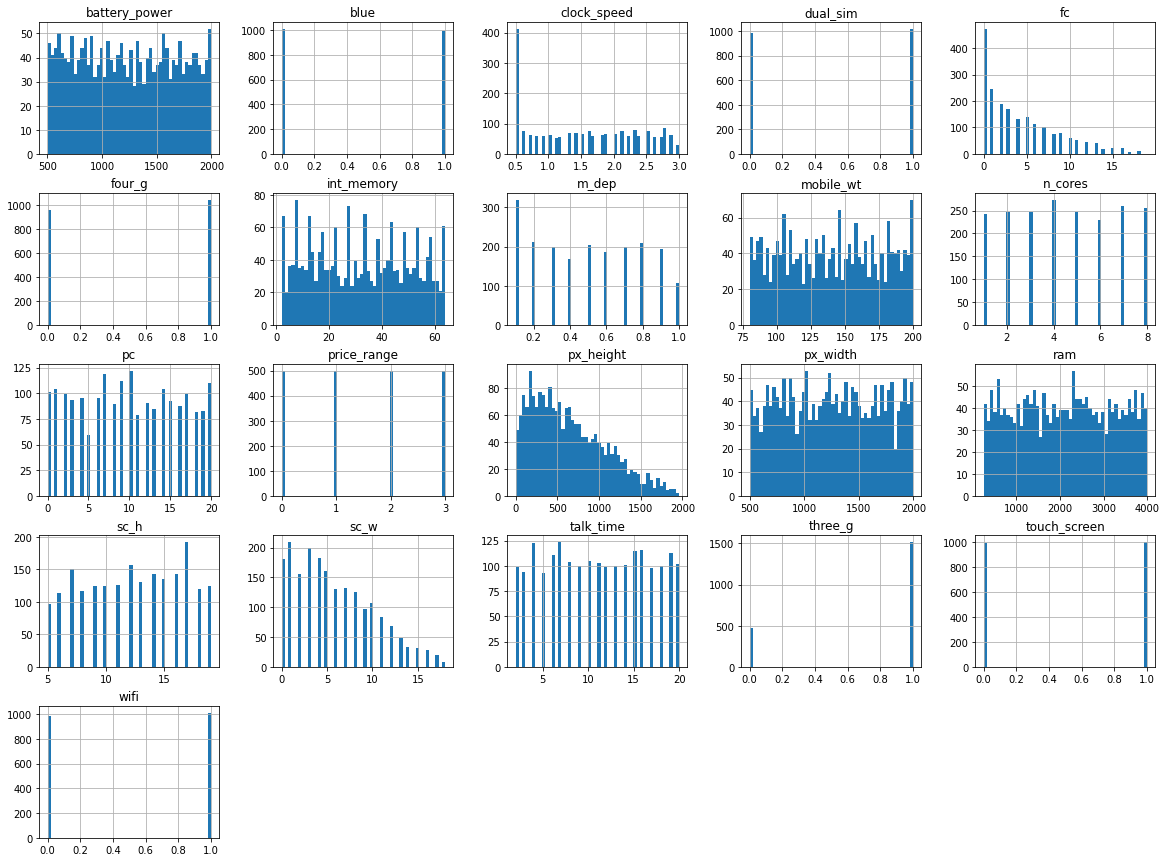

In [80]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### ¿Qué cosas vemos en este histograma?

- Nuestra columna a predecir `price_range` no está desbalanceada.
- Los atributos tiene escalas bastante diferentes. Por ejemplo `clock_speed` (0.5-3) vs `ram`(250-4000).
- Tal y como sabíamos por la descripción de los datos, tenemos varias variables cualitativas: `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, `wifi` y nuestro target `price_range`.

Vamos a comprobar algunas de estas cosas. 

En primer lugar, vemos que tenemos un número de muestras igual para las 4 categorías de precio.

In [81]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [82]:
import seaborn as sns

def show_variable(data, column_name, bins=50):
    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(f'Visualización de datos para la columna {column_name}')
    
    sns.boxplot(data=data, x='price_range', y=column_name, ax=ax1)
    ax1.set_title('Gráfica de cajas')
    
    sns.violinplot(data=data, x='price_range', y=column_name, ax=ax2, inner=None)
    ax2.set_title('Gráfica de violin')
    
    sns.histplot(x=data[column_name], hue=data['price_range'], ax=ax3)
    plt.title("Histograma")
    
    print(data.groupby('price_range').describe()[column_name])

### Variables

#### Battery Power

Viendo el gráfico de cajas, podemos ver que la variable `battery_power` es mayor en los teléfonos de rango de precio más altos. Si vemos la mediana para los móviles de valor 3, la mitad de los teléfonos están por encima de 1400mAh. Mientras que para los móviles de menor rango de precios, sólo el 25% está por encima de esa cifra.

             count      mean         std    min      25%     50%      75%  \
price_range                                                                 
0            500.0  1116.902  410.801305  503.0   770.50  1066.0  1431.25   
1            500.0  1228.868  438.614528  501.0   843.00  1206.0  1596.25   
2            500.0  1228.320  452.863065  501.0   816.50  1219.5  1635.75   
3            500.0  1379.984  414.992261  503.0  1034.75  1449.5  1733.50   

                max  
price_range          
0            1994.0  
1            1996.0  
2            1998.0  
3            1994.0  


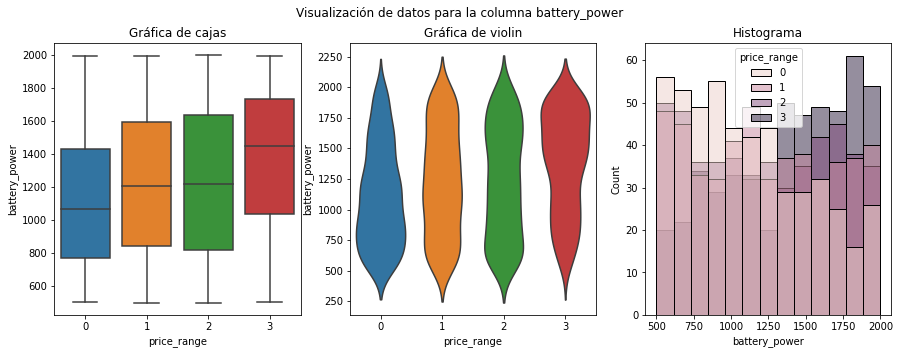

In [83]:
show_variable(df, 'battery_power')

#### Clock Speed

Como podemos ver en el gráfico de cajas y de violin, el `clock_speed` no varía mucho entre los distintos rangos de precio. Siendo el del rango de precio más bajo el que más varía.

Además, vemos que en la distribución de datos, hay una concrentación muy grande en 0.5 (un total de 413 móviles). Estos 413 modelos se dividen casi a partes iguales entre los 4 rangos de precio.

             count    mean       std  min  25%   50%  75%  max
price_range                                                   
0            500.0  1.5502  0.848941  0.5  0.6  1.55  2.3  3.0
1            500.0  1.4886  0.814479  0.5  0.6  1.50  2.2  3.0
2            500.0  1.5298  0.804404  0.5  0.7  1.50  2.2  3.0
3            500.0  1.5204  0.796450  0.5  0.7  1.50  2.2  3.0


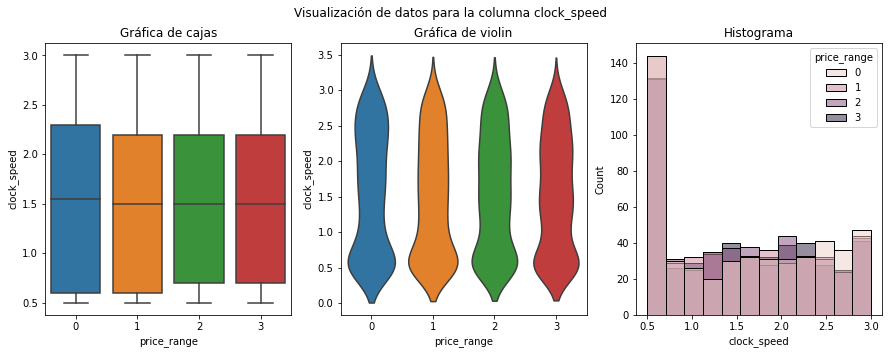

In [84]:
show_variable(df, 'clock_speed')

In [85]:
df['clock_speed'].value_counts().sort_index().head(3)

0.5    413
0.6     74
0.7     64
Name: clock_speed, dtype: int64

In [86]:
clock_speed_05 = df[df['clock_speed'] == 0.5]
clock_speed_05['price_range'].value_counts().sort_index()

0    109
1    105
2     96
3    103
Name: price_range, dtype: int64

#### FC (megapíxeles de cámara frontal)

En este caso, en el gráfico de cajas, vemos que hay más valores atícipos por la parte superior, a partir de 13MP para los de rango de precio 0.

Por otro lado, si observamos la mediana, vemos que el 50% de los móviles, independientemente del rango de precio, tienen unos 2.5MP o menos. Los valores para los rangos de precio 1,2 y 3 son muy similares.

En cuento a la distribución, vemos que hay una gran cantidad de móviles con 0MP, es decir, que no tienen cámara. De nuevo, se distribuyen de forma similar entre los diferentes rangos de precio.

             count   mean       std  min  25%  50%  75%   max
price_range                                                  
0            500.0  4.084  4.183772  0.0  1.0  3.0  6.0  19.0
1            500.0  4.340  4.499432  0.0  1.0  3.0  7.0  18.0
2            500.0  4.498  4.347390  0.0  1.0  3.0  7.0  18.0
3            500.0  4.316  4.332399  0.0  1.0  3.0  7.0  18.0


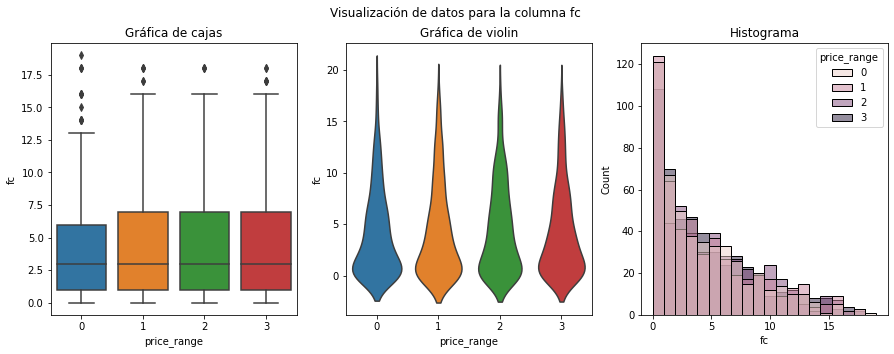

In [87]:
show_variable(df, 'fc')

In [88]:
df['fc'].value_counts().sort_index().head(3)

0    474
1    245
2    189
Name: fc, dtype: int64

In [89]:
fc_0 = df[df['fc'] == 0]
fc_0['price_range'].value_counts().sort_index()

0    121
1    124
2    121
3    108
Name: price_range, dtype: int64

#### int_memory (Memoria interna)

En cuanto a la memoria interna, vemos que los móviles tienen un almacenamiento similar para los diferentes rangos de precio, aunque se aprecia una mejora en los móviles de mayor rango de precio. Así, el 50% de los móviles de mayor precio, tiene 32Gb o más.

             count    mean        std  min   25%   50%   75%   max
price_range                                                       
0            500.0  31.174  18.101023  2.0  15.0  30.0  47.0  64.0
1            500.0  32.116  18.000739  2.0  16.0  32.0  47.0  64.0
2            500.0  30.920  18.441958  2.0  15.0  30.0  48.0  64.0
3            500.0  33.976  17.930377  2.0  18.0  34.5  49.0  64.0


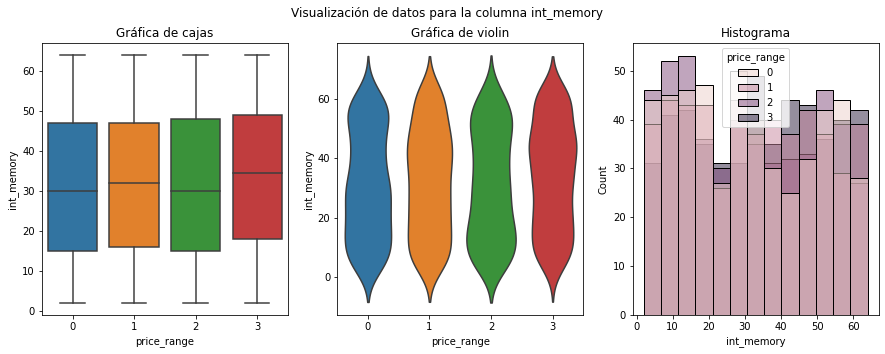

In [90]:
show_variable(df, 'int_memory')

#### m_ped (grosor del teléfono)

En este caso vemos una gran variabilidad de datos sobre todo en los de rango de precio más alto. También vemos que la mediana se mantiene más o menos igual para todos los rangos de precio.

             count    mean       std  min  25%  50%  75%  max
price_range                                                  
0            500.0  0.4902  0.288184  0.1  0.2  0.5  0.7  1.0
1            500.0  0.5240  0.286895  0.1  0.3  0.5  0.8  1.0
2            500.0  0.4908  0.286215  0.1  0.2  0.5  0.7  1.0
3            500.0  0.5020  0.291901  0.1  0.2  0.5  0.8  1.0


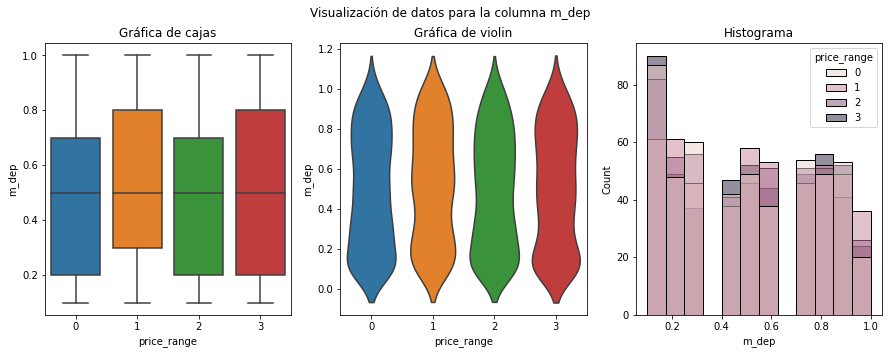

In [91]:
show_variable(df, 'm_dep')

#### mobelie_wt (peso)

En el peso, vemos cómo los móviles de mayor rango de precio, tienen un menor peso. El 50% de de éstos modelo, no llegan a los 140mg.

Parece que hay una tendencia a que cuando más caro es el móvil, se reduce el peso. Observamos cómo para el rango de precio 2, esto no se cumple.

             count     mean        std   min     25%    50%    75%    max
price_range                                                              
0            500.0  140.552  36.378319  80.0  108.75  142.0  173.0  200.0
1            500.0  140.510  35.678956  80.0  109.00  141.0  170.0  200.0
2            500.0  143.614  34.320326  80.0  114.00  145.0  172.0  200.0
3            500.0  136.320  34.911994  80.0  104.00  134.0  165.0  200.0


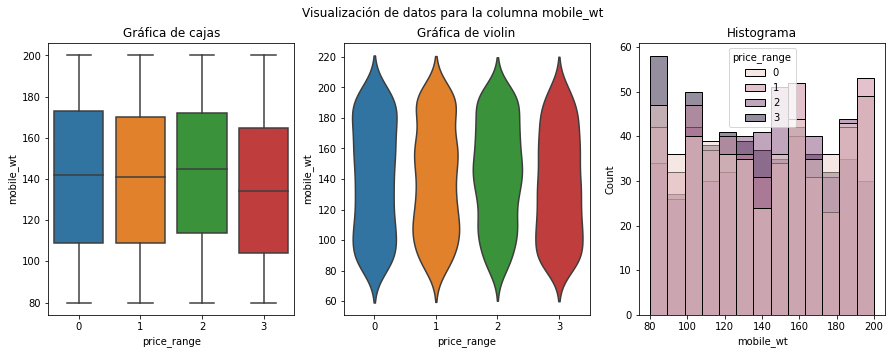

In [92]:
show_variable(df, 'mobile_wt')

#### n_cores

En este caso, observamos cómo para el rango de precios más alto, la variabilidad en el número de cores es grandísima. Por otro lado, la mediana se sitúa en 5 para todos los rangos de precio menos para el 1, que es en 4. El resto de rangos cuentan con 7 o más cores para el 25% de sus modelos.

             count   mean       std  min  25%  50%  75%  max
price_range                                                 
0            500.0  4.600  2.268544  1.0  3.0  5.0  7.0  8.0
1            500.0  4.298  2.311684  1.0  2.0  4.0  6.0  8.0
2            500.0  4.682  2.262546  1.0  3.0  5.0  7.0  8.0
3            500.0  4.502  2.297074  1.0  2.0  5.0  7.0  8.0


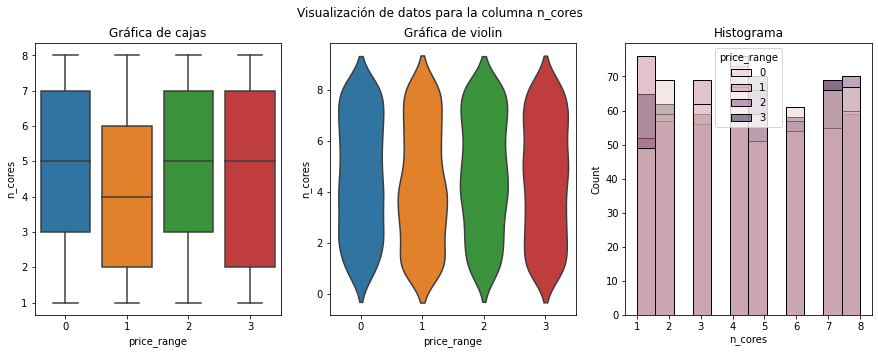

In [93]:
show_variable(df, 'n_cores')

#### pc (Megapíxeles, camára principal)

Al igual que pasa con la cámara frontal, vemos que las distribuciones de los valores son muy similares en cada rango. Sí es cierto, que en el caso de los móviles de rango de precio más alto, el 25% tiene 16MP o más. En todos los casos el mínimo y máximo está en 0-20MP

             count    mean       std  min  25%   50%   75%   max
price_range                                                     
0            500.0   9.574  6.095805  0.0  4.0   9.5  15.0  20.0
1            500.0   9.924  6.124806  0.0  4.0  10.0  15.0  20.0
2            500.0  10.018  5.952861  0.0  5.0  10.0  15.0  20.0
3            500.0  10.150  6.085521  0.0  5.0  10.0  16.0  20.0


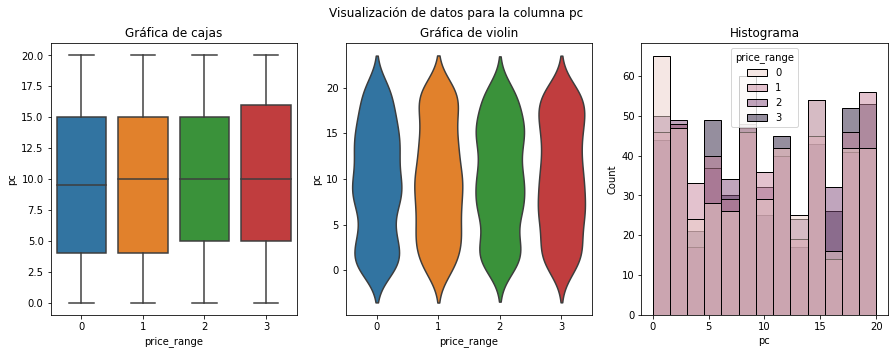

In [110]:
show_variable(df, 'pc')

#### px_height y px_width (Resolución de pantalla)

Aquí sí podemos observar que en los móviles de rango de precio más caro, la resolución de pantalla es más grande. Se puede apreciar más en el ancho de la pantalla. En el ancho de pantalla el 75% de los móviles de rango de precio más alto, tiene más de 1000px.

Viendo el historgrama, también vemos que la distribución del alto de la pantalla está mucho más concentrada en valores por debajo de los 1000px, mientras que en el ancho está más repartido.

Si analizamos los datos de la resulucón, vemos que en el alto de resolución, tenemos valores que no parecen válidos (0px-10px). Eso no se observa en el ancho de la resolución.

**Nota:** En el preprocesado, podemos sustiuir estos valores, calculando la moda del ratio para estos valores.

             count     mean         std   min     25%    50%      75%     max
price_range                                                                  
0            500.0  536.408  372.824164   1.0  229.00  465.5   776.50  1878.0
1            500.0  666.892  441.351209   0.0  327.25  606.0   944.25  1914.0
2            500.0  632.284  445.789232  10.0  252.50  538.5   942.75  1960.0
3            500.0  744.848  483.720179   0.0  341.75  674.0  1109.50  1949.0
             count      mean         std    min      25%     50%      75%  \
price_range                                                                 
0            500.0  1150.270  413.001780  500.0   805.75  1132.5  1452.75   
1            500.0  1251.908  433.564352  500.0   878.75  1223.0  1629.00   
2            500.0  1234.046  427.757151  508.0   862.50  1221.5  1613.25   
3            500.0  1369.838  426.823571  501.0  1041.50  1415.5  1746.25   

                max  
price_range          
0            1989.0  
1  

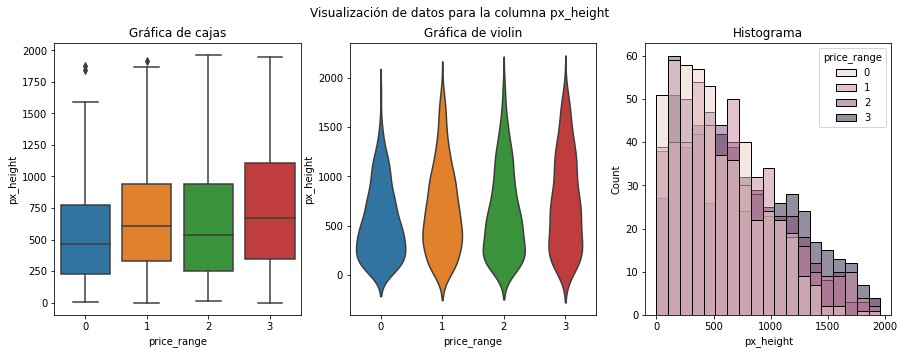

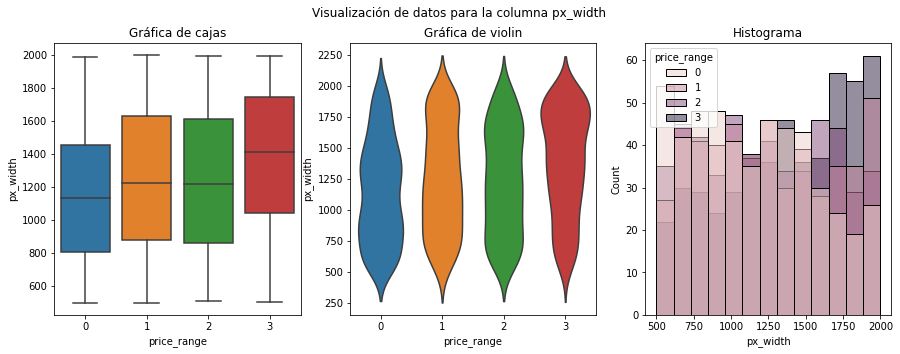

In [111]:
show_variable(df, 'px_height')
show_variable(df, 'px_width')

#### RAM

En el caso de la memoria RAM es evidente la relación con el rango de precios. Además de la gráfica de cajas, podemos ver en el histograma como la parte más a la derecha (más memoria RAM), pertenece a los móviles de mayor rango de precio.

Podemos ver, por ejemplo, que el 75% de los móviles de rango de precio más alto, tienen más de 3Gb de RAM, mientras que el 75% de los móviles de rango de precio más bajo, tiene 1GB o menos.

             count      mean         std     min      25%     50%      75%  \
price_range                                                                  
0            500.0   785.314  362.755397   256.0   488.75   719.5  1037.00   
1            500.0  1679.490  465.850159   387.0  1354.00  1686.5  2033.75   
2            500.0  2582.816  496.211735  1185.0  2292.75  2577.0  2927.00   
3            500.0  3449.232  393.019923  2259.0  3207.50  3509.5  3764.75   

                max  
price_range          
0            1974.0  
1            2811.0  
2            3916.0  
3            3998.0  


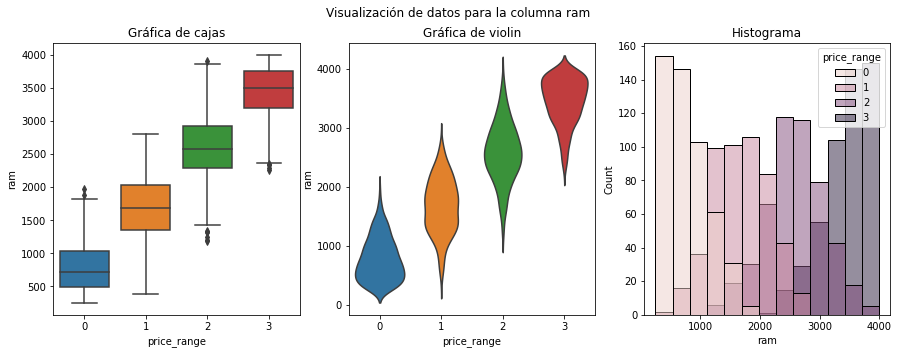

In [96]:
show_variable(df, 'ram')

#### sc_h y sc_w (Tamaño de pantalla)

Podemos ver que en los diferentes rangos de precio, no hay mucha variabilidad en cuanto a los tamaños de pantalla. Sí que vemos que los móviles de rango de precio más alto tiene la mediana más alta en cuento a la altura. En cuanto a la altura de pantalla, solo el 25% de los móviles, sin importar su rango de precio, supera los 16cm.

En este caso, en cuanto al ancho de la pantalla, vemos valores de 0cm. Esto también tendremos que tratarlo en el preprocesado.

             count    mean       std  min  25%   50%   75%   max
price_range                                                     
0            500.0  12.324  4.206949  5.0  9.0  12.0  16.0  19.0
1            500.0  12.212  4.226913  5.0  8.0  12.0  16.0  19.0
2            500.0  12.010  4.234355  5.0  8.0  12.0  16.0  19.0
3            500.0  12.680  4.168976  5.0  9.0  13.0  16.0  19.0
             count   mean       std  min  25%  50%    75%   max
price_range                                                    
0            500.0  5.682  4.174173  0.0  2.0  5.0   8.25  18.0
1            500.0  5.544  4.238868  0.0  2.0  5.0   8.00  18.0
2            500.0  5.714  4.265747  0.0  2.0  5.0   8.00  17.0
3            500.0  6.128  4.716790  0.0  2.0  5.0  10.00  18.0


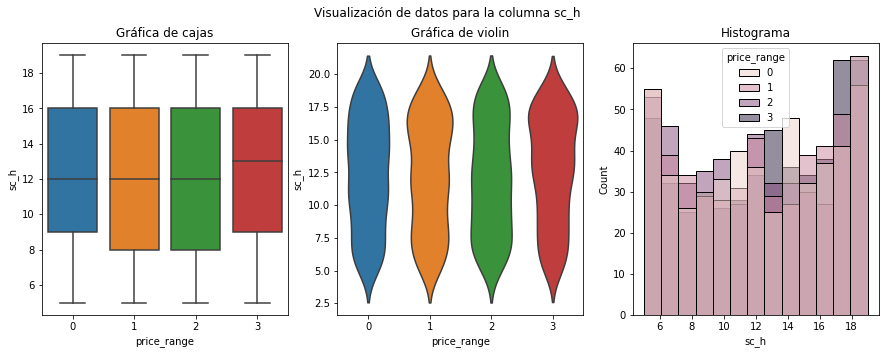

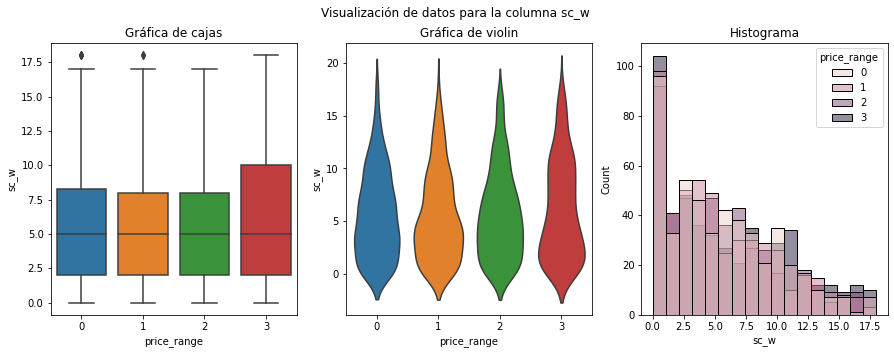

In [112]:
show_variable(df, 'sc_h')
show_variable(df, 'sc_w')

#### talk_time

En este caso, vemos que el tiempo de llamada tampoco varía mucho entre los rangos de precio. Por ejemplo, la mediana del tiempo de llamada es menor en el rango de precio más alto que en el de rango 1.

La mediana de rango de precios más alto está más cercana al primer cuartil que al tercero.

             count    mean       std  min  25%   50%   75%   max
price_range                                                     
0            500.0  10.612  5.397009  2.0  6.0  10.0  15.0  20.0
1            500.0  11.362  5.570729  2.0  7.0  12.0  16.0  20.0
2            500.0  10.972  5.433070  2.0  6.0  11.0  16.0  20.0
3            500.0  11.098  5.443129  2.0  7.0  11.0  16.0  20.0


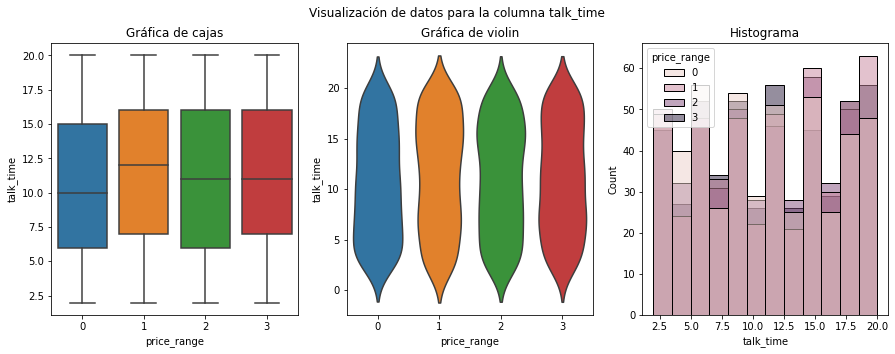

In [98]:
show_variable(df, 'talk_time')

### Resumen de variables

A _priori_ las variables que parecen tener una variación en los diferentes rangos de precio son las siguientes:

| Variable        | Relación | Intensidad |
| :-------------: |:-------------|:-------------|
| battery_power      | Directa | Normal |
| int_memory      | Directa      | Baja |
| mobile_wt | Inversa      | Baja |
| px_height | Directa      | Baja |
| px_width | Directa      | Normal |
| ram | Directa      | Alta |



### Otras variables

Vamos a evaluar alguna otra variable sintética.

In [99]:
sc_df = df.copy()
sc_df['sc_ratio'] = sc_df['sc_w'] / sc_df['sc_h']

px_df = df.copy()
px_df['px_ratio'] = px_df['px_width'] / px_df['px_height']

Vemos que con la ratio del tamaño de pantalla, tampoco hay una gran variabilidad entre los diferentes rangos de precio.

             count      mean       std  min       25%       50%       75%  \
price_range                                                                 
0            500.0  0.456843  0.282061  0.0  0.207895  0.500000  0.687500   
1            500.0  0.442288  0.281347  0.0  0.200000  0.437500  0.666667   
2            500.0  0.469223  0.291223  0.0  0.200000  0.473684  0.728788   
3            500.0  0.469766  0.300597  0.0  0.200000  0.466667  0.740132   

                  max  
price_range            
0            0.947368  
1            0.947368  
2            0.944444  
3            0.947368  


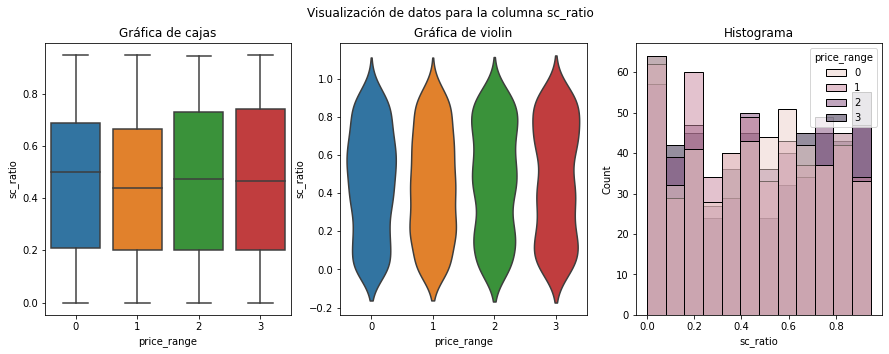

In [100]:
show_variable(sc_df, 'sc_ratio')

Al representar la ratio en la resolución de pantalla, observamos algunos valores que no son correctos. Por ejemplo, `px_height` con valores 0,1...

In [101]:
px_df[['px_height', 'px_width', 'px_ratio']].sort_values('px_ratio', ascending=False)

,px_height,px_width,px_ratio
1481,0,1987,inf
1933,0,994,inf
801,1,926,926.000000
1314,3,1662,554.000000
1305,5,1744,348.800000
...,...,...,...
4,1208,1212,1.003311
288,681,683,1.002937
1827,1899,1904,1.002633
1771,1960,1963,1.001531


### Variables cualitativas

In [102]:
def show_cualitative_variables(df, columns):
    fig, ax = plt.subplots(2, 3, figsize=(15,10))
    for i in range(2):
        for j in range(3):
            pd.crosstab(df[columns[i*3+j]], df['price_range']).plot(kind='bar', ax=ax[i][j])

Si mostramos cómo se distribuyen las variables cualitativas en función del rango de precios, vemos que tienen una distribución similar pra cualquier rango.

Por otro lado, vemos que hay menos móviles sin 3G que con 3G.

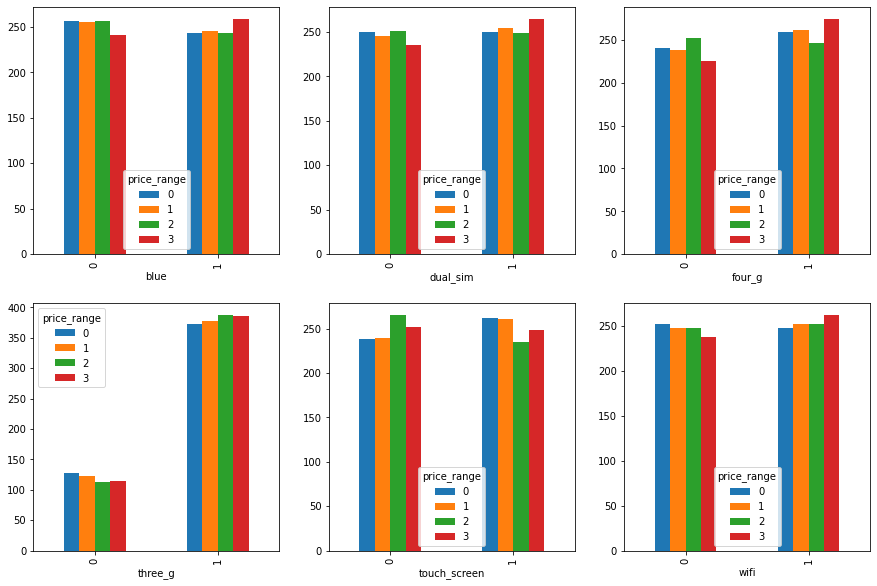

In [103]:
show_cualitative_variables(df, qualitative_columns)

## Estudio de correlaciones

Vamos a evaluar la correlación lineal entre las variables mediante la correlación de Pearson.

Podemos ver que existe una correlación fuerte entre la variable `ram` y nuestro objetivo `prince_range`. Se aprecia además una correlación muy débil con las varaibles `battery_power`, `px_height` y `px_width`.

Además, encontramos cierta correlación entre las siguientes variables:
- `three_g`-`four_g`
- `pc`-`fc`
- `px_height`-`px_width`
- `sc_h` - `sc_w`

Al final, son características que tienen que ver entre ellas, la conectividad, la calidad de las cámara o el tamaño de pantalla y resolución.

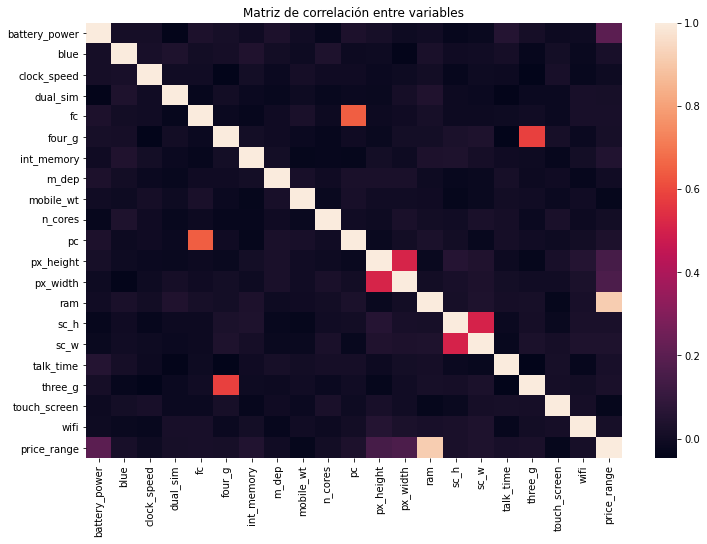

In [104]:
def plot_correlation_matrix(df, title, method='pearson'):
    plt.figure(figsize=(12, 8))
    corr = df.corr(method=method)
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)
    plt.title(title)
    plt.show()

plot_correlation_matrix(df, title="Matriz de correlación entre variables")

Vamos a ver el valor de correlación de las columnas con la el `price_range`. Viendo los resultados, vamos a mostrar las relaciones entre las 4 columnas con mayor correlación.

In [105]:
corr_matrix = df.corr()
corr_matrix["price_range"].sort_values(ascending=False)[1:8]

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
Name: price_range, dtype: float64

Se puede apreciar un límite entre `px_width` y `px_height`.

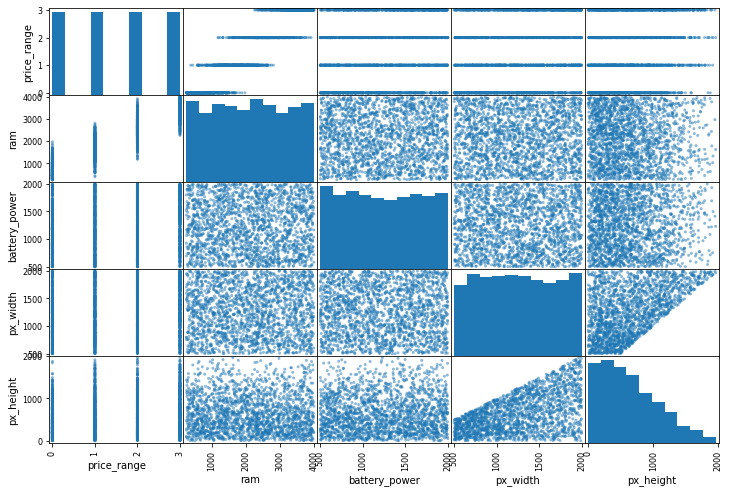

In [106]:
from pandas.plotting import scatter_matrix

attributes = ["price_range", "ram", "battery_power", "px_width", "px_height"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

Vamos a crear una variable de ratio entre el ancho y alto de resolución de pantalla. Tenemos el problema de que tenemos datos que escapan del rango correcto.

In [107]:
px_df = df.copy()
px_df = px_df[px_df['px_height'] > 0]
px_df['px_ratio'] = px_df['px_width'] / px_df['px_height']
px_df = px_df[px_df['px_ratio'] < 5]

In [108]:
px_corr_matrix = px_df.corr()
px_corr_matrix["price_range"].sort_values(ascending=False)[1:6]

ram              0.916552
battery_power    0.196336
px_width         0.179862
px_height        0.176955
sc_w             0.058299
Name: price_range, dtype: float64

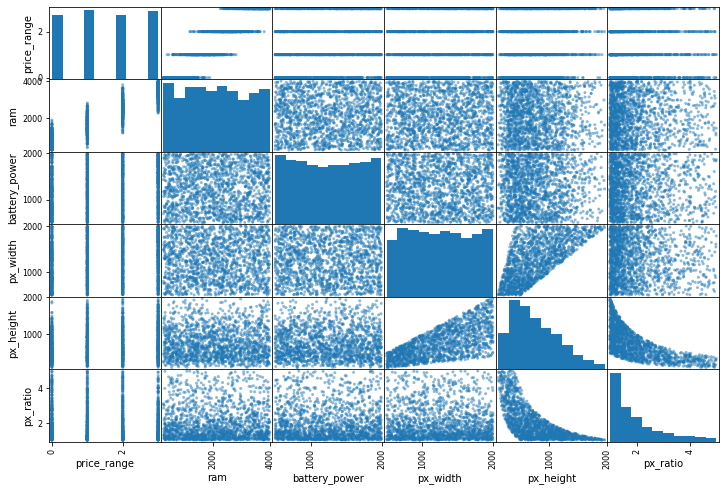

In [109]:
attributes = ["price_range", "ram", "battery_power", "px_width", "px_height", "px_ratio"]
scatter_matrix(px_df[attributes], figsize=(12, 8))
plt.show()